## Observations and Insights 

+ Capomulin and Ramicane had the most mice to test on 

+ Capomulin was very effective for Mouse s185 have a significant tumor decrease over 40 days. 

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
merged_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
# Checking the number of mice - using value_counts spits out count of mice
merged_data_df["Mouse ID"].value_counts()

g989    13
c282    10
g497    10
s337    10
q597    10
        ..
f932     1
n482     1
t573     1
v199     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [34]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_data_df[["Mouse ID", "Timepoint"]].value_counts()

Mouse ID  Timepoint
g989      15           2
          0            2
          10           2
          5            2
          20           2
                      ..
q610      30           1
          35           1
q633      0            1
          5            1
a203      0            1
Length: 1888, dtype: int64

In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_dupe_mice= merged_data_df.set_index("Mouse ID")
mouse = merged_dupe_mice.loc["g989", :]
mouse.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_merged_mice = merged_dupe_mice.drop(index = 'g989')
new_merged_df = new_merged_mice.reset_index()
new_merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [42]:
# Checking the number of mice in the clean DataFrame.
new_merged_df["Mouse ID"].value_counts()

c282    10
o926    10
t724    10
z581    10
c559    10
        ..
n482     1
d133     1
u153     1
t573     1
b447     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

group_drug = new_merged_df.groupby("Drug Regimen")
mean = round(group_drug["Tumor Volume (mm3)"].mean(),2)
median = round(group_drug["Tumor Volume (mm3)"].median(),2)
variance = round(group_drug["Tumor Volume (mm3)"].var(),2)
std = round(group_drug["Tumor Volume (mm3)"].std(),2)
SEM = round(group_drug["Tumor Volume (mm3)"].sem(),2)

summary_table = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": std, "SEM": SEM})
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

agg_summary = new_merged_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

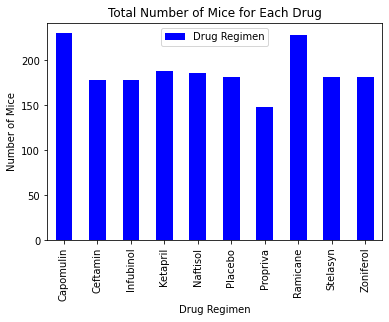

In [45]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Count total number of mice for each drug
drug_df = pd.DataFrame(group_drug["Drug Regimen"].count())
# Plot total number of mice for each drug in bar graph
count_bar = drug_df.plot(kind = "bar", title = "Total Number of Mice for Each Drug", color="blue")
# Label the x and y axis
count_bar.set_ylabel("Number of Mice")
count_bar.set_xlabel("Drug Regimen")

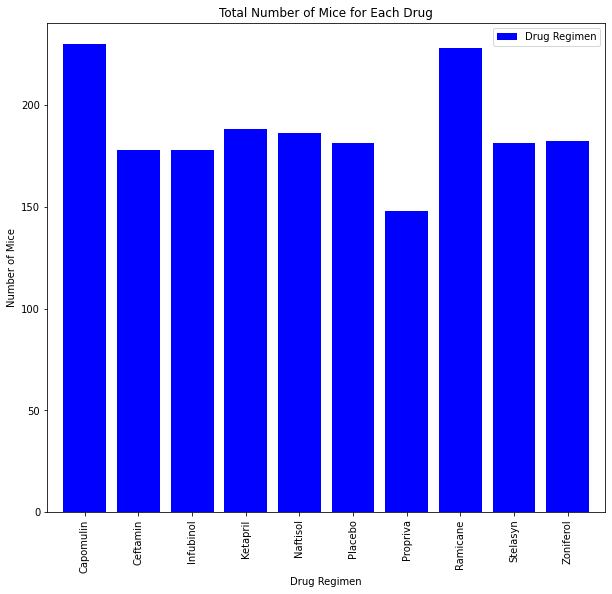

In [46]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(drug_df))
ticks = [value for value in x_axis]

plt.figure(figsize = (10,9))
plt.bar(x_axis, drug_df["Drug Regimen"], color="blue", align="center")
plt.xticks(ticks,list(drug_df.index), rotation = "vertical")
plt.xlim(-.7, len(x_axis)-.3)
plt.ylim(0, max(drug_df["Drug Regimen"])+10)
plt.title("Total Number of Mice for Each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
column_name = ["Drug Regimen"]
plt.legend(column_name, loc ="best")
plt.show()

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Separating/Group by gender

mice_gender = new_merged_df.groupby("Sex")
gender_df = pd.DataFrame(mice_gender["Sex"].count())


#Plotting graph
gender_df.plot(kind="pie", title = " Distribution of Female and Male Mice", autopct = "%1.2f%%", shadow = True, 
               startangle = 140, colors=["pink","lightblue"], legend=False)


ValueError: pie requires either y column or 'subplots=True'

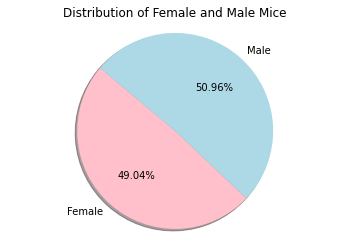

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(gender_df.index.values)
gender_count = gender_df["Sex"]
colors = ["pink", "lightblue"]
plt.pie(gender_count, labels=genders, colors=colors, autopct="%1.2f%%", shadow=True, startangle=140)
plt.title("Distribution of Female and Male Mice")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
four_drugs = new_merged_df[new_merged_df["Drug Regimen"].isin(drugs_list)]

# Start by getting the last (greatest) timepoint for each mouse
last_tumor=four_drugs[four_drugs['Timepoint']==four_drugs['Timepoint'].max()]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_new_df = pd.merge(last_tumor, clean_merged_df, on=["Timepoint", "Mouse ID"], how="inner")

# Delete and rename columns of the 
del merge_new_df["Metastatic Sites_x"]
del merge_new_df["Metastatic Sites_y"]
del merge_new_df["Drug Regimen_y"]
del merge_new_df["Sex_y"]
del merge_new_df["Age_months_y"]
del merge_new_df["Weight (g)_y"]
del merge_new_df["Tumor Volume (mm3)_y"]

merge_new_df = merge_new_df.rename(columns={"Drug Regimen_x": "Drug Regimen", "Sex_x": "Sex", "Age_months_x":"Age in Months",
                                               "Weight(g)_x": "Weight (g)", "Tumor Volume (mm3)_x": "Tumor Volume (mm3)"})
merge_new_df.head()

,Mouse ID,Drug Regimen,Sex,Age in Months,Weight (g)_x,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,45,22.050126
1,s185,Capomulin,Female,3,17,45,23.343598
2,x401,Capomulin,Female,16,15,45,28.484033
3,m601,Capomulin,Male,22,17,45,28.430964
4,g791,Ramicane,Male,11,16,45,29.128472


In [57]:
# Put treatments into a list for for loop (and later for plot labels)
treaments_list = []

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs_list:
    drugs_vol = merge_new_df.loc[merge_new_df["Drug Regimen"] == drug,"Tumor Volume (mm3)"]
    tumor_volume.append(drugs_vol)
    quartiles = drugs_vol.quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    
    # Determine outliers using upper and lower bounds
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    
    print(f"-----------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")

-----------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 37.31 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
-----------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 30.98
The upper quartile of Ramicane is: 38.51
The interquartile range of Ramicane is: 7.53
The the median of Ramicane is: 34.85 
Values below 19.69 for Ramicane could be outliers.
Values above 49.8 for Ramicane could be outliers.
-----------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 62.75
The upper quartile of Infubinol is: 67.69
The interquartile range of Infubinol is: 4.94
The the median of Infubinol is: 66.08 
Values below 55.34 for Infubinol could be ou

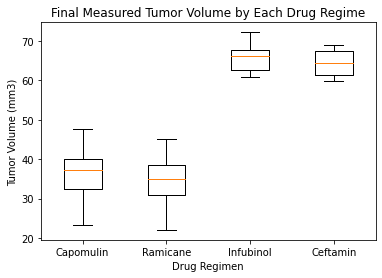

In [60]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots()
ax.boxplot(tumor_volume, flierprops = dict(markerfacecolor='red',markersize=12))
ax.set_title("Final Measured Tumor Volume by Each Drug Regime")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")
plt.xticks([1,2,3,4], drugs_list)
plt.show()

## Line and Scatter Plots

In [62]:
# Find all the mice that were treated with Capomulin
capomulin = new_merged_df.loc[new_merged_df["Drug Regimen"]=="Capomulin"]
capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [63]:
capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1439,r157,Capomulin,Male,22,25,0,45.000000,0
1440,r157,Capomulin,Male,22,25,5,45.597064,0
1441,r157,Capomulin,Male,22,25,10,46.059608,0


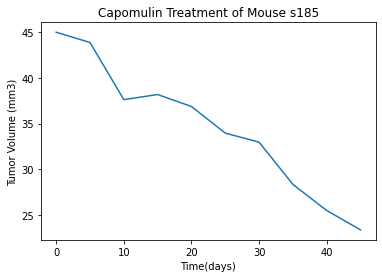

In [67]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice = capomulin.loc[capomulin["Mouse ID"]=="s185"]
time_series = capomulin_mice["Timepoint"]
plt.plot(time_series, capomulin_mice["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse s185")
plt.xlabel("Time(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [70]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Groupby and Average
capomulin_mouse = capomulin.groupby("Mouse ID").mean()
capomulin_mouse_df = pd.DataFrame(capomulin_mouse)
capomulin_mouse_df.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


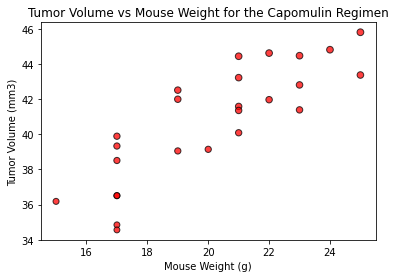

In [75]:
#Generating scatter plot
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(capomulin_mouse_df["Weight (g)"], capomulin_mouse_df["Tumor Volume (mm3)"], marker = "o", 
            facecolors="red", edgecolors="black", s=capomulin_mouse_df["Tumor Volume (mm3)"], alpha=.75)
plt.title("Tumor Volume vs Mouse Weight for the Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [76]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capomulin_mouse_df["Weight (g)"],capomulin_mouse_df["Tumor Volume (mm3)"])
print(f"The correlation between both factors is {round(correlation[0],2)}.")

The correlation between both factors is 0.84.


The r-squared is: 0.8419363424694718
The equation of the regression line is: y= 0.95x + 21.55


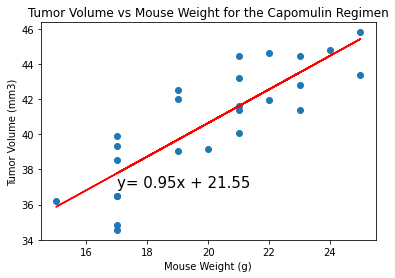

In [77]:
#Adding Linear Regression Model
x_values = capomulin_mouse_df["Weight (g)"]
y_values = capomulin_mouse_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = f'y= {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (17,37), fontsize=15, color="black")
plt.title("Tumor Volume vs Mouse Weight for the Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()